<a href="https://colab.research.google.com/github/GRTO/DiplomadoPucp/blob/master/FullSwainsoniDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive/My\ Drive/'Colab Notebooks'/'Data mining'/'Clase 2/'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/Data mining/Clase 2
 cars.csv    'FullSwainsoniDataset (1).ipynb'  'MetalsInRivers GB.xlsx'
 cars.ipynb   FullSwainsoniDataset.ipynb        TimeUse.csv
 film.csv     FullSwainsoniDataset.txt	        TimeUse.ipynb
 film.ipynb  'MetalsInRivers GB.ipynb'


In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
     | 178.2MB 991kB/s
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756023 sha256=de274ee3abe4471b04283a717b00aab307c2c8f4e179047b4ed86aa040acfe65
  Stored in directory: /tmp/pip-ephem-wheel-cache-1yczouwf/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
!pip install pyproj==1.9.6

# Lectura de los datos

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
df = pd.read_csv('FullSwainsoniDataset.txt', sep="\t", encoding = "ISO-8859-1");
df.head()

,AnimalID,ID,tracktime,timeID,longt,lat,clusterID
0,SW1,0,8/18/1995 0:00,30,-116.270,43.460,0
1,SW1,0,8/18/1995 16:10,31,-116.250,43.452,0
2,SW1,0,8/18/1995 20:15,32,-116.294,43.453,0
3,SW1,0,8/18/1995 21:55,33,-116.283,43.446,0
4,SW1,0,8/19/1995 21:49,35,-116.345,43.524,0


In [0]:
df.describe()

,ID,timeID,longt,lat,clusterID
count,11548.000000,11548.000000,11548.000000,11548.000000,11548.000000
mean,21.270003,2622.434534,-83.649371,3.300626,0.620367
std,12.157692,1428.384175,21.206515,33.084946,1.326682
min,0.000000,1.000000,-121.960000,-38.617000,0.000000
25%,10.000000,1318.000000,-104.054500,-31.986025,0.000000
50%,22.000000,2769.000000,-75.126650,3.297610,0.000000
75%,31.000000,3796.250000,-63.488225,39.126500,1.000000
max,42.000000,5220.000000,-57.666000,53.846000,14.000000


# Objeto de estudio

**Objeto de estudio:** trayectoria de aves migratorias

# Data temporal

**Datos temporales:** el tiempo de llegada de las aves en un punto específico en el mundo **(Longitud y latitud)**, este seria la columna **trackTime**

# Pretratamiento de la data y visualizacion de indicadores

**Agrupación por clusters**

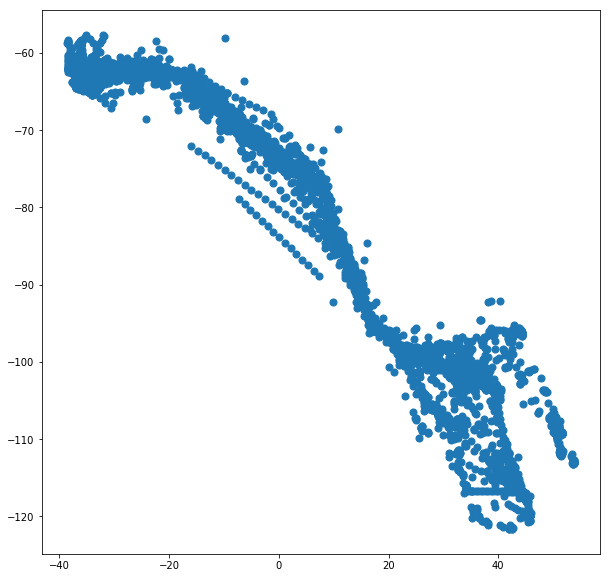

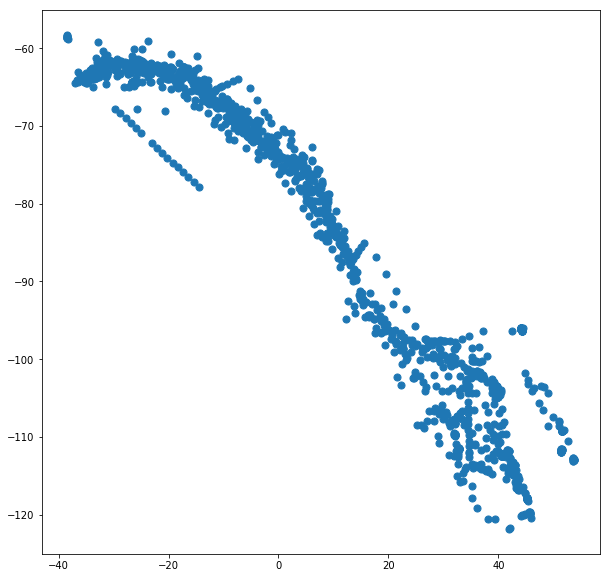

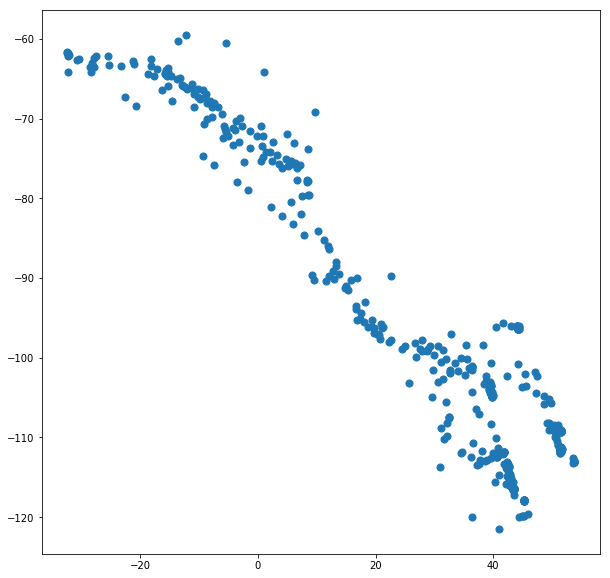

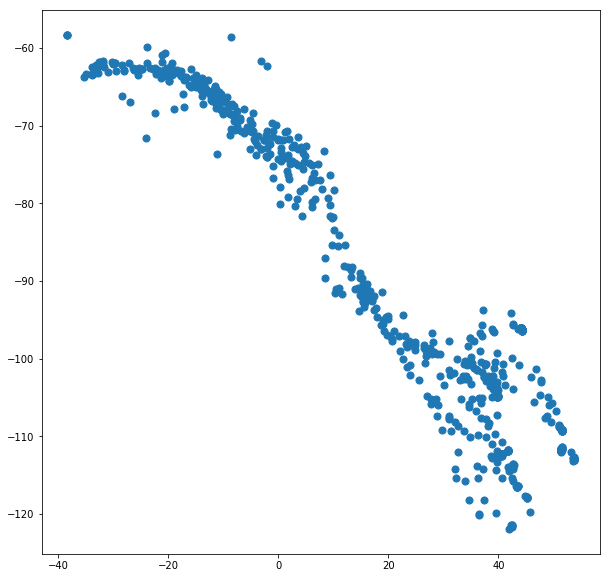

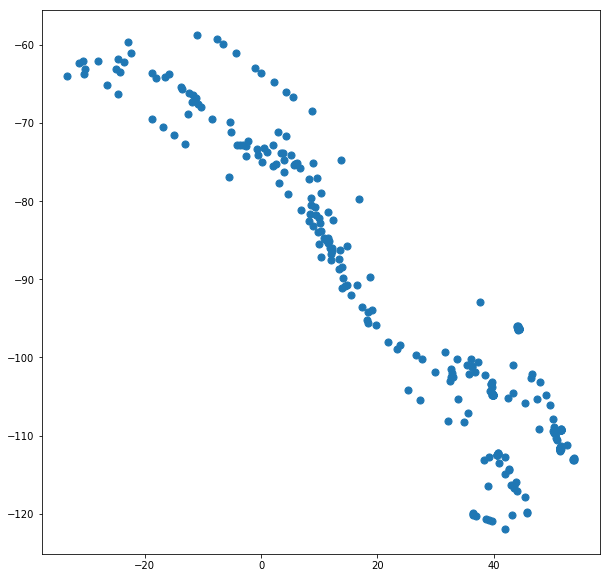

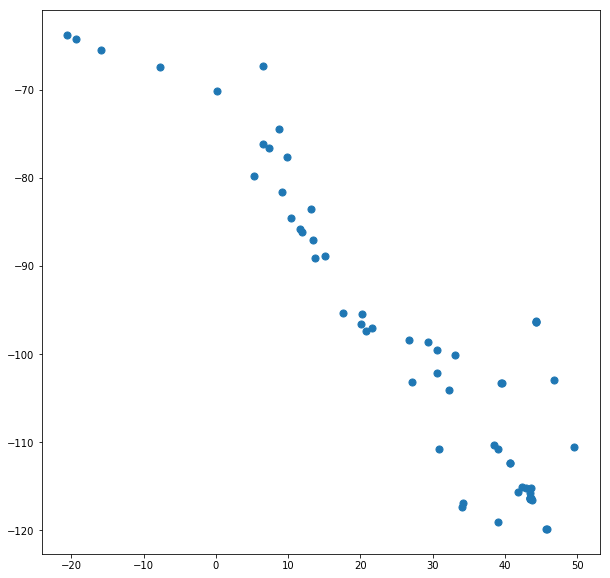

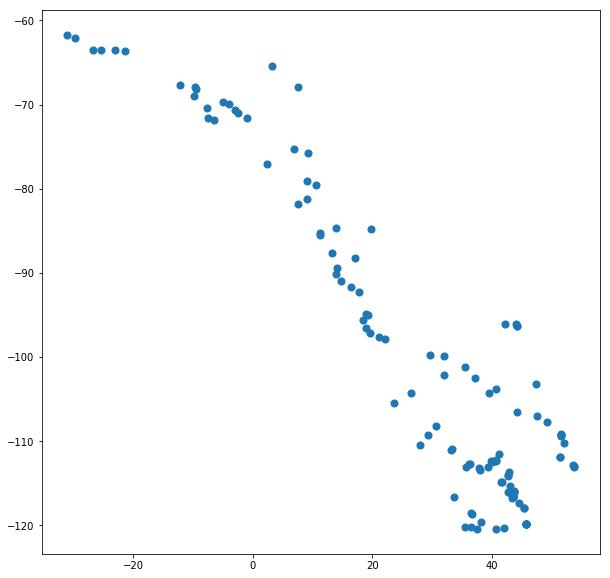

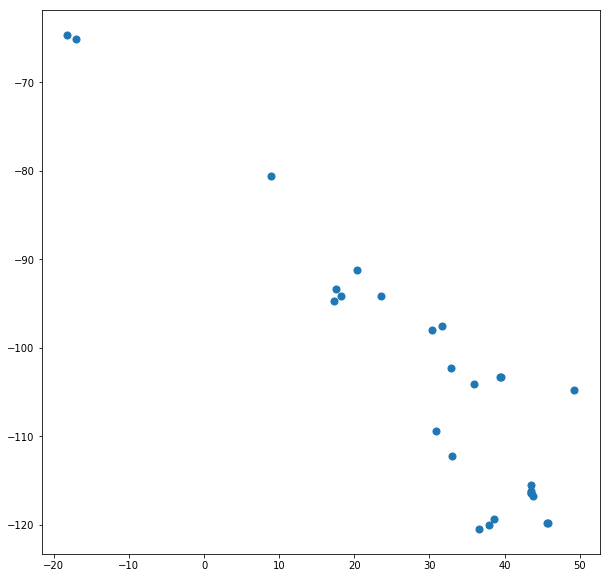

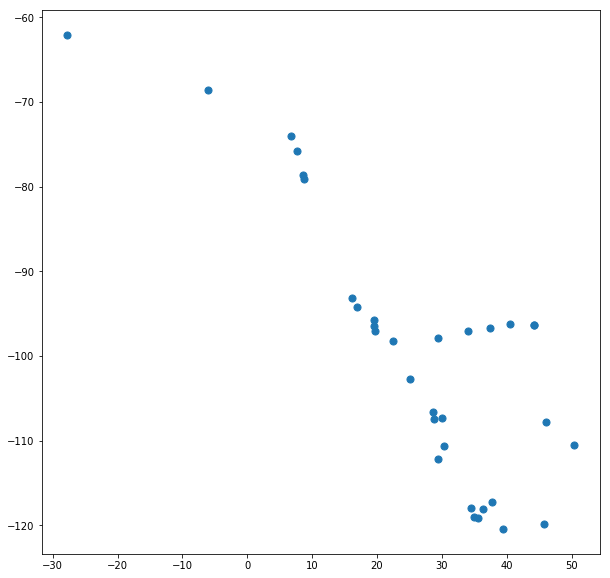

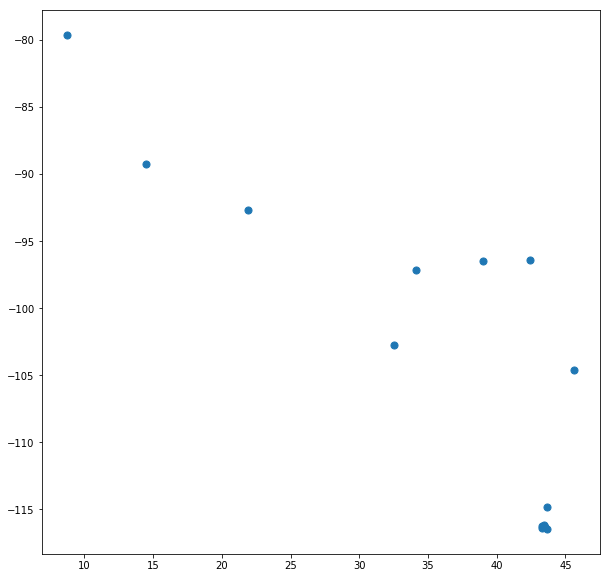

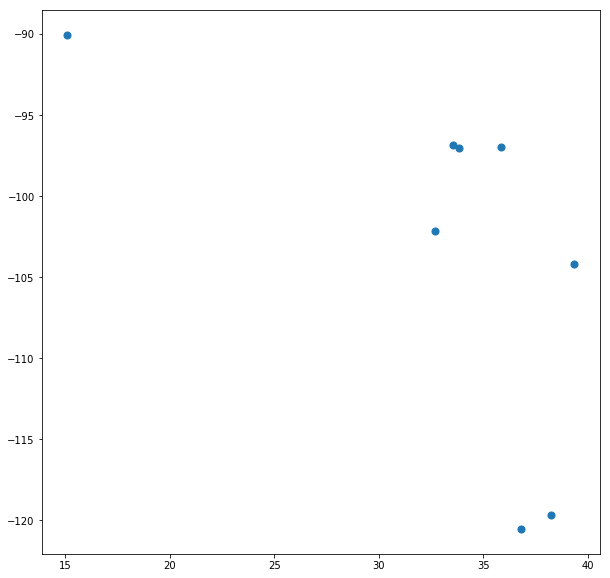

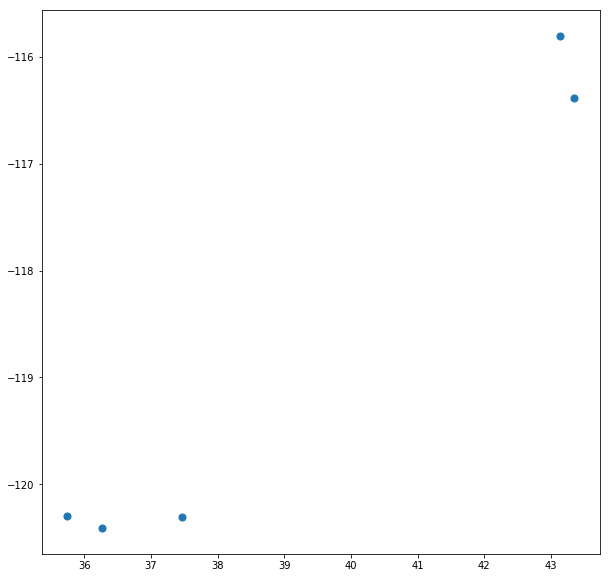

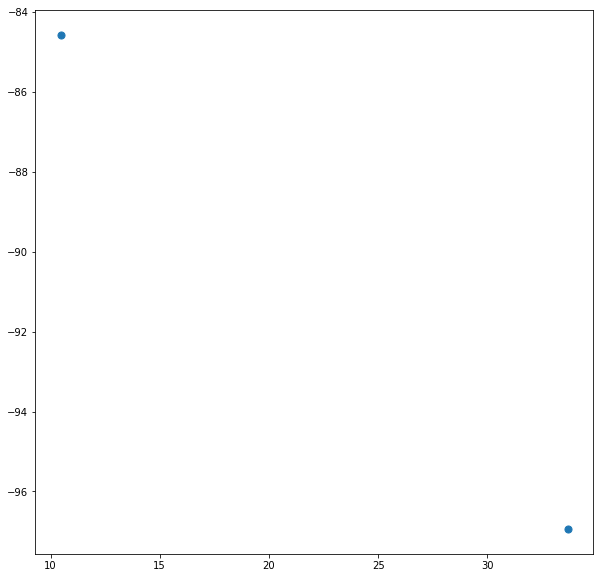

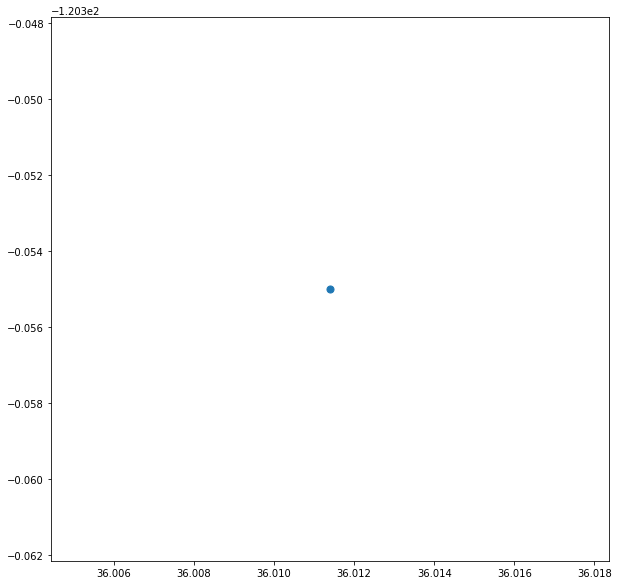

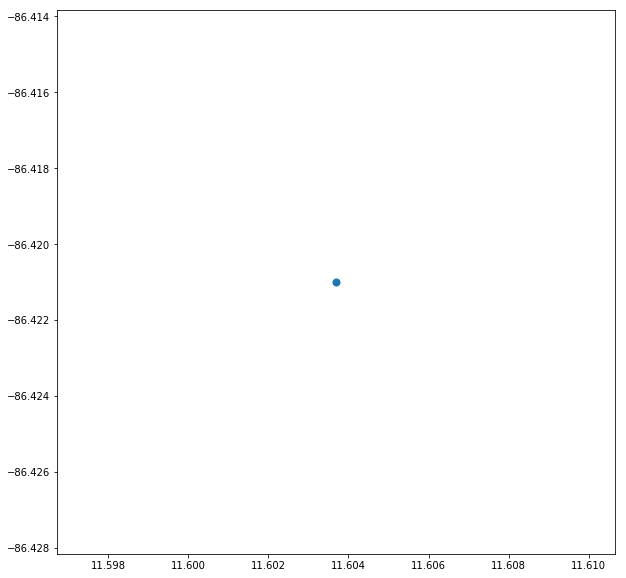

In [0]:
import numpy as np
import matplotlib.pyplot as plt


clusters = df.clusterID

clustersList = list(df.clusterID.unique())
listColorElements = ['red', 'yellow', 'gray', 'blue', 'green', 'purple', 'orange', 'skyblue', 'seagreen', 'brown', 'lightskyblue', 'indianred', 'violet', 'palegoldenred', 'pink']

for index, cluster in enumerate(clustersList):
  clusterData = df[df.clusterID == cluster]
  y = clusterData.longt
  x = clusterData.lat
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111)
  scatter = ax.scatter(x,y,s=50)
  fig.show()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

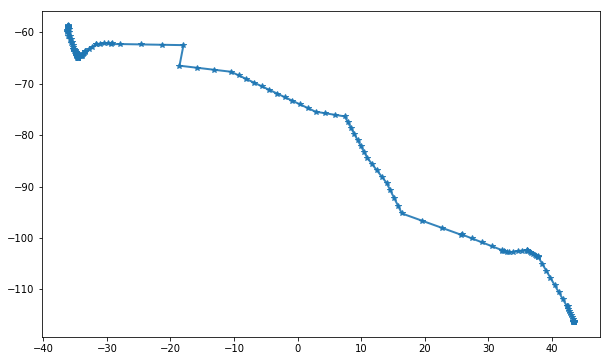

In [0]:
plt.figure(figsize=(10,6))
dfDistance = df[df.AnimalID == 'SW1']
plt.plot(dfDistance.lat, dfDistance.longt, marker='*', linewidth=2, alpha=0.9)
plt.show()


In [0]:
from itertools import chain

def draw_map(m, scale=1):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

# Indicadores

1. **Indicador:** en este grafico se muestra la trayectoria del animal **SW1**

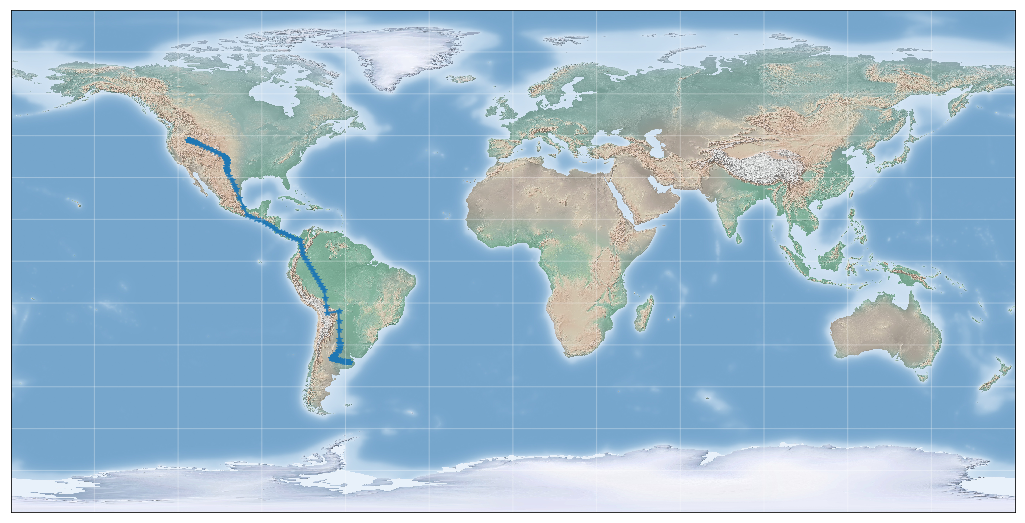

In [0]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
plt.plot(dfDistance.longt, dfDistance.lat, marker='*', linewidth=2, alpha=0.9)
draw_map(m)

**2. Indicador:** en este grafico se muestra la trayectoria del animal **SW10**

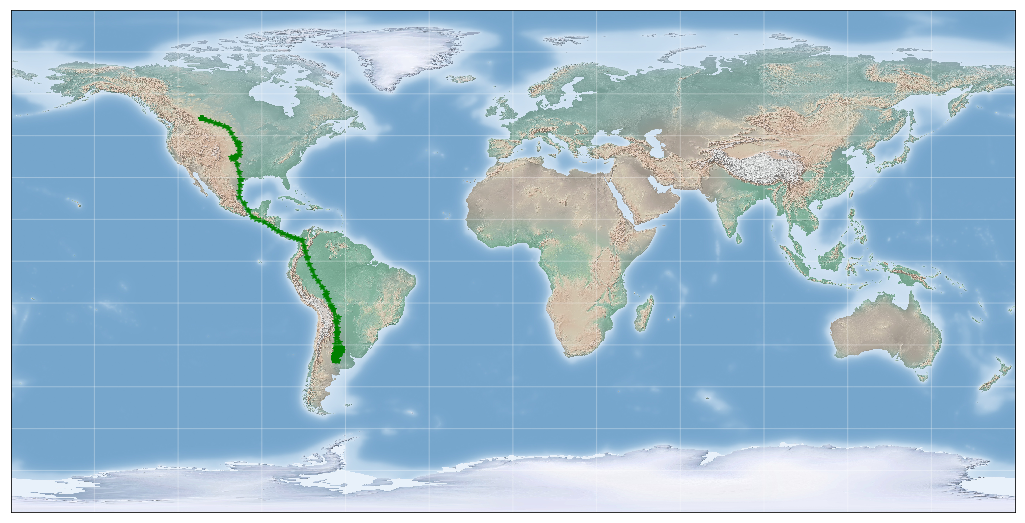

In [0]:
dfDistance = df[df.AnimalID == 'SW10']
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
plt.plot(dfDistance.longt, dfDistance.lat, marker='*', linewidth=2, alpha=0.9, c='green')
draw_map(m)

**3. Indicador:** en este grafico se muestra la trayectoria del animal **SW11**

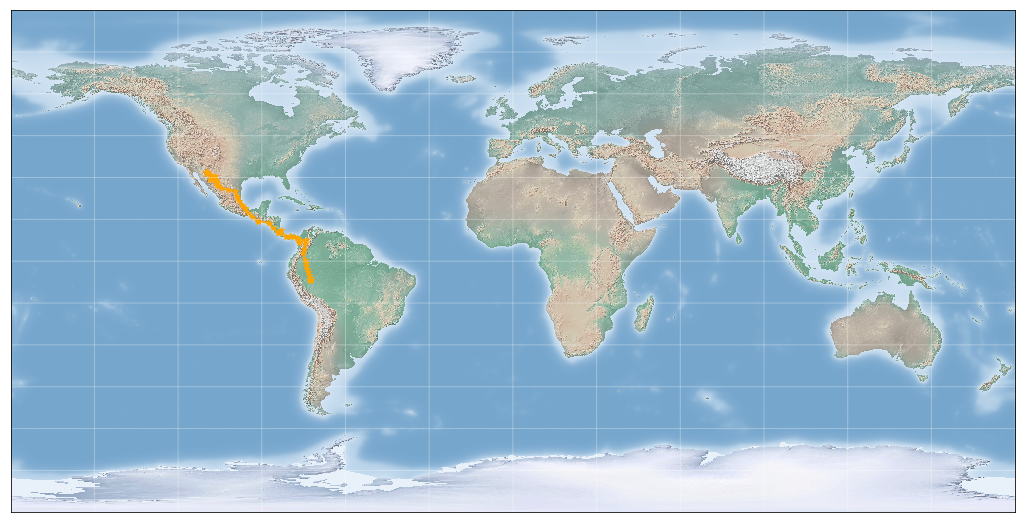

In [0]:
dfDistance = df[df.AnimalID == 'SW11']
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
plt.plot(dfDistance.longt, dfDistance.lat, marker='*', linewidth=2, alpha=0.9, c='orange')
draw_map(m)